### Import libraries and file

In [3]:
import pandas as pd
import csv
import numpy as np
import warnings
from scipy.spatial.distance import squareform, pdist
from scipy.cluster.hierarchy import complete, fcluster
from scipy.cluster.hierarchy import linkage
import seaborn as sns
# from kmedoids import kmedoids
from operator import itemgetter, attrgetter, methodcaller
import distutils
import os
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.colorbar import colorbar
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [4]:
#increase width to 100% in Jupyter Notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### Files and paths needed to execute functions

In [5]:
apps_permission = 'anpn2.csv'

### Function do find the max size of columns

In [6]:
#preprocessing
def get_max_len():
    with open(apps_permission, 'r') as csvfile:
        reader = csv.reader(csvfile)
        num = []
        for i, row in enumerate(reader):
            num.append(len(row))
        m = max(num)
        #print m
        return m
    
print(get_max_len())

11


In [7]:
def read_lines_from_csv(list_of_lines, filename):
    list_lines = []
    with open(filename, 'r') as csvfile:
        reader = csv.reader(csvfile)
        for i, row in enumerate(reader):
            if i+1 in list_of_lines:
                #Converts list of strings into list of ints --> results = list(map(int, results))
                list_lines.append(list(map(int, row)))
        return list_lines

### Read and show dataset

In [8]:
df = pd.read_csv(apps_permission, header=None, na_values=0, names=range(get_max_len()), low_memory=False)

In [9]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,a1,p1,p2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,a2,p5,p7,p9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a3,p2,p3,p4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,a4,p7,p5,p8,p3,NaN,NaN,NaN,NaN,NaN,NaN
4,a5,p4,p1,p6,p9,p7,p3,NaN,NaN,NaN,NaN


In [10]:
df

,0,1,2,3,4,5,6,7,8,9,10
0,a1,p1,p2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,a2,p5,p7,p9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a3,p2,p3,p4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,a4,p7,p5,p8,p3,NaN,NaN,NaN,NaN,NaN,NaN
4,a5,p4,p1,p6,p9,p7,p3,NaN,NaN,NaN,NaN
5,a6,p7,p3,p5,p2,NaN,NaN,NaN,NaN,NaN,NaN
6,a7,p1,p5,p9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,a8,p6,p3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,a9,p1,p3,p5,p6,p7,p8,p9,NaN,NaN,NaN
9,a10,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10


### Filter Dataset

In [11]:
permissions = set()
permissions_list = set()
apps_list = set()


for index, row in df.iterrows():
    app = row[0]
    
    for perm in row[1:]:
        if str(perm) == 'nan':
            break
        else:
            #perm_list = perm.split('.')
            perm_list = perm
            perm_t = perm_list.lower()
            permissions.add(perm_t)
            permissions_list.add((app, perm_t))
            apps_list.add(app)

### Create new dataframe from filter permissions and apps

In [12]:
df_apps = pd.DataFrame(list(permissions_list))
df_apps.head()
df_apps

,0,1
0,a10,p10
1,a3,p3
2,a19,p1
3,a5,p3
4,a17,p6
...,...,...
78,a14,p4
79,a6,p7
80,a3,p4
81,a10,p5


### Create a matrix from dataframe

In [13]:
matrix = pd.crosstab(index=df_apps[0], columns = df_apps[1])
#matrix.to_csv('permissions_matrix_fd1.csv', index=False)

In [14]:
matrix.shape

(20, 10)

In [15]:
map_perm = {idx: c for idx, c in enumerate(matrix.columns)}

In [16]:
array_matrix = np.array(matrix)

In [17]:
array_matrix.shape

(20, 10)

### Calculate similarity matrix (>= 16gb to run)

In [18]:
similarity_matrix = np.float32(squareform(pdist(matrix, 'cosine')))

### Write similarity matrix in file (.npy)

In [19]:
#np.save('sim_matrix_fd1.npy', similarity_matrix)
#or
#np.savetxt("foo_fd1.csv", similarity_matrix, delimiter=",", fmt='%1.8f')

### Delete index and colum name in matrix

In [20]:
del matrix.index.name

In [21]:
del matrix.columns.name

### Verify how index is organized and if needed reindex the matrix rows order

In [22]:
matrix.index

Index(['a1', 'a10', 'a11', 'a12', 'a13', 'a14', 'a15', 'a16', 'a17', 'a18',
       'a19', 'a2', 'a20', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9'],
      dtype='object')

In [23]:
matrix.reindex(['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8',
      'a9', 'a10', 'a11', 'a12', 'a13', 'a14', 'a15', 'a16', 'a17', 'a18',
      'a19', 'a20'])

,p1,p10,p2,p3,p4,p5,p6,p7,p8,p9
a1,1,0,1,0,0,0,0,0,0,0
a2,0,0,0,0,0,1,0,1,0,1
a3,0,0,1,1,1,0,0,0,0,0
a4,0,0,0,1,0,1,0,1,1,0
a5,1,0,0,1,1,0,1,1,0,1
a6,0,0,1,1,0,1,0,1,0,0
a7,1,0,0,0,0,1,0,0,0,1
a8,0,0,0,1,0,0,1,0,0,0
a9,1,0,0,1,0,1,1,1,1,1
a10,1,1,1,1,1,1,1,1,1,1


In [24]:
new_matrix = matrix.reindex(['a2', 'a3', 'a7', 'a11', 'a13', 'a14'])
new_matrix

,p1,p10,p2,p3,p4,p5,p6,p7,p8,p9
a2,0,0,0,0,0,1,0,1,0,1
a3,0,0,1,1,1,0,0,0,0,0
a7,1,0,0,0,0,1,0,0,0,1
a11,0,1,0,0,0,1,0,0,1,0
a13,1,0,1,1,0,0,0,0,0,0
a14,0,0,0,0,1,1,1,0,0,0


### Transform distance matrix from numpy array to panda dataframe to show it in a better way

In [25]:
matrix_cosine_distance = pd.DataFrame(similarity_matrix)

In [26]:
matrix_cosine_distance

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,0.552786,1.000000,0.683772,0.183503,1.000000,1.000000,0.646447,0.646447,0.367544,0.465478,1.000000,1.000000,0.591752,1.000000,0.711325,0.646447,0.591752,1.000000,0.732739
1,0.552786,0.000000,0.452277,0.292893,0.452277,0.452277,0.367544,0.367544,0.367544,0.292893,0.163340,0.452277,0.683772,0.452277,0.367544,0.225403,0.367544,0.452277,0.552786,0.163340
2,1.000000,0.452277,0.000000,1.000000,1.000000,0.666667,0.422650,0.711325,0.711325,0.741801,0.345346,0.666667,1.000000,1.000000,0.422650,1.000000,0.711325,0.666667,1.000000,0.563564
3,0.683772,0.292893,1.000000,0.000000,0.483602,0.741801,0.552786,0.329180,0.776393,0.600000,0.661938,0.483602,0.552786,0.483602,0.552786,0.087129,0.552786,0.483602,0.683772,0.323877
4,0.183503,0.452277,1.000000,0.483602,0.000000,1.000000,1.000000,0.422650,0.711325,0.483602,0.563564,1.000000,0.422650,0.333333,0.711325,0.528596,0.422650,0.666667,0.591752,0.563564
5,1.000000,0.452277,0.666667,0.741801,1.000000,0.000000,1.000000,0.711325,0.422650,0.741801,0.563564,0.666667,1.000000,0.666667,0.711325,0.528596,0.711325,0.666667,0.591752,0.563564
6,1.000000,0.367544,0.422650,0.552786,1.000000,1.000000,0.000000,0.750000,0.750000,0.552786,0.433053,0.422650,1.000000,1.000000,0.500000,0.591752,0.750000,0.711325,1.000000,0.433053
7,0.646447,0.367544,0.711325,0.329180,0.422650,0.711325,0.750000,0.000000,1.000000,0.776393,0.622036,0.422650,0.500000,0.711325,0.250000,0.387628,0.250000,0.422650,0.646447,0.244071
8,0.646447,0.367544,0.711325,0.776393,0.711325,0.422650,0.750000,1.000000,0.000000,0.552786,0.433053,1.000000,1.000000,0.422650,0.750000,0.591752,0.750000,1.000000,0.646447,0.622036
9,0.367544,0.292893,0.741801,0.600000,0.483602,0.741801,0.552786,0.776393,0.552786,0.000000,0.154846,0.741801,1.000000,0.741801,1.000000,0.452277,0.776393,0.483602,0.683772,0.492907


In [27]:
matrix_cosine_distance_filtered = matrix_cosine_distance.iloc[[1,2,6,10,12,13],[1,2,6,10,12,13]]
mfi = matrix_cosine_distance_filtered.rename(index={1: 'a2', 2: 'a3', 6: 'a7', 10: 'a11', 12: 'a13', 13: 'a14'})
mfi.rename(columns={1: 'a2', 2: 'a3', 6: 'a7', 10: 'a11', 12: 'a13', 13: 'a14'})


,a2,a3,a7,a11,a13,a14
a2,0.000000,0.452277,0.367544,0.163340,0.683772,0.452277
a3,0.452277,0.000000,0.422650,0.345346,1.000000,1.000000
a7,0.367544,0.422650,0.000000,0.433053,1.000000,1.000000
a11,0.163340,0.345346,0.433053,0.000000,1.000000,0.781782
a13,0.683772,1.000000,1.000000,1.000000,0.000000,0.422650
a14,0.452277,1.000000,1.000000,0.781782,0.422650,0.000000


### Execute kmedoid from 2 to 5 clusters

In [31]:
medoid={}
cluster={}
for i in range(2,7):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
        sm, c = kmedoids(similarity_matrix, k=i)
        medoid[i] = sm
        cluster[i] = c

### Save medoids and clusters in a npy files

In [272]:
#np.save('sample_model_20x10_medoid.npy', medoid)

In [273]:
#np.save('sample_model_20x10_cluster.npy', cluster)

### Load the npy files that were saved

In [274]:
#dt_clusters = np.load('/mnt/googleplay-api/sample_model_12x10_cluster.npy',allow_pickle=True).tolist()

### Create csv files that each one represents a cluster

In [275]:
dt_clusters = cluster

In [276]:
#dt_clusters = np.load('/mnt/googleplay-api/sample_model_20x10_cluster.npy').tolist()
for n, x in enumerate(dt_clusters.keys()):
    dt = dt_clusters[x]
    
    dt1 = [key for key, list_values in dt.items() for cluster in list_values]
    dt2 = [item_id for key, list_values in dt.items() for item_id in list_values]

    dt3 = sorted(list(zip(dt2, dt1)), key=lambda x: x[0])

    file2write = '/mnt/csv-files/sample_model/20x10/i2csv_cluster_{}_20x10.csv'.format(n)

    with open(file2write, 'w') as ifw:
        for item_id, cluster in dt3:
            ifw.write("{}\t{}\n".format(item_id, cluster))

### Using csv files to create intersection between partitions named "Consensus Groups"

In [277]:
merged = pd.DataFrame()
clustersData = pd.DataFrame(columns=["ID", "cLabel", "pLabel"]) #pd.DataFrame(columns=["cID", "cLabel", "pLabel", "cSize"])

#Directory where cluster files was stored
dirPartitions = '/mnt/csv-files/sample_model/20x10'

(head, tail) = os.path.split(dirPartitions)
print('head: '+head)
print('tail: ' + tail)
expDirName = tail + '-files'
print('expDirName: '+expDirName)

resDir = head + '/' + expDirName # os.path.join(head, expDirName);
print(resDir)

if not os.path.exists(resDir):
    os.makedirs(resDir)

allClustersLabels = []
for filename in os.listdir(dirPartitions):
    file =  dirPartitions + '/' + filename
    p = pd.read_csv(file, sep='\t', header=None)
    p.columns = ["ID", "clusterLabel"]
    allClusters = set(p["clusterLabel"])
    for cluster in allClusters:
        cLabel = "c"+str(cluster)
        newCluster = cLabel+filename
        allClustersLabels.insert(len(allClustersLabels), newCluster)
        p[newCluster] = (p["clusterLabel"] == cluster).astype(int) # column with cluster membership (1/0)
        clustersData = clustersData.append({"ID": newCluster, "cLabel": cLabel, "pLabel": filename, "cSize": p[newCluster].sum()}, ignore_index=True)

    del p["clusterLabel"]

    if merged.empty:
        merged = pd.DataFrame(p)
    else:
        merged = merged.merge(p, how="outer", on="ID")

distinct = {}
dist2 = merged.groupby(allClustersLabels, sort=False)
file = resDir + '/listsIdenticalObjs.tsv'
file_txt = resDir + '/listsIdenticalObjs.txt'
print(file)
with open(file, 'w') as f:
    out = csv.writer(f, delimiter='\t', lineterminator='\n')
    # identify the objects identically grouped in all clusters
    for name, group in dist2:
        values = group["ID"].values
        distinct[values[0]] = values
        out.writerow(values)
print(file_txt)
with open(file_txt, 'w') as f:
    out = csv.writer(f, delimiter=',', lineterminator='\n')
    # identify the objects identically grouped in all clusters
    for name, group in dist2:
        values = group["ID"].values
        distinct[values[0]] = values
        out.writerow(values)
repeatedObjs = merged.loc[~merged["ID"].isin(distinct.keys())]["ID"].index
# save the lists of identically grouped objects

merged.drop(repeatedObjs,inplace=True)

objectsIDs = merged["ID"]

clustersData = clustersData.set_index(["ID"])
merged = merged.set_index(["ID"])

mergedT = merged.transpose()

# identifies the distinct clusters
distinctClusters = mergedT.drop_duplicates().index
print(distinctClusters)

file = resDir + '/listDistinctClusters.tsv'
with open(file, 'w') as f:
    out = csv.writer(f, delimiter='\t', lineterminator='\n')
    out.writerow([k for k in distinctClusters])

complete = mergedT.join(clustersData)
complete.sort_values(by=["cSize"], ascending=False, inplace=True)

file = resDir + '/result.tsv'
complete.to_csv(file ,sep='\t', index_label = "ID")

eacM = {}
for o1 in objectsIDs:
    eacM[o1] = complete.loc[complete[o1]==1]["cSize"].sum()

x = sorted(eacM.items(), key=itemgetter(1), reverse=True)
print(x)
file = os.path.join(resDir, 'objOrderEAC.tsv')
file = resDir + '/objOrderEAC.tsv'
with open(file, 'w') as f:
    out = csv.writer(f, delimiter='\t', lineterminator='\n')
    out.writerow([k for (k,v) in x])

head: /mnt/csv-files/sample_model
tail: 20x10
expDirName: 20x10-files
/mnt/csv-files/sample_model/20x10-files
/mnt/csv-files/sample_model/20x10-files/listsIdenticalObjs.tsv
/mnt/csv-files/sample_model/20x10-files/listsIdenticalObjs.txt
Index(['c0i2csv_cluster_0_20x10.csv', 'c1i2csv_cluster_0_20x10.csv',
       'c0i2csv_cluster_4_20x10.csv', 'c1i2csv_cluster_4_20x10.csv',
       'c2i2csv_cluster_4_20x10.csv', 'c4i2csv_cluster_4_20x10.csv',
       'c5i2csv_cluster_4_20x10.csv', 'c0i2csv_cluster_1_20x10.csv',
       'c1i2csv_cluster_1_20x10.csv', 'c0i2csv_cluster_3_20x10.csv',
       'c2i2csv_cluster_3_20x10.csv', 'c4i2csv_cluster_3_20x10.csv',
       'c1i2csv_cluster_2_20x10.csv', 'c3i2csv_cluster_2_20x10.csv'],
      dtype='object')
[(1, 61.0), (14, 58.0), (3, 47.0), (7, 44.0), (0, 39.0), (8, 39.0), (11, 38.0), (2, 34.0), (12, 31.0), (5, 30.0), (13, 17.0)]


### Count similar objects

In [33]:
file_to_read = open("../csv-files/sample_model/20x10-files/listsIdenticalObjs.tsv", "r")
file_to_write = open("../csv-files/sample_model/20x10-files/Counted_apps_per_line.csv", "w")
line_counter = 0
for line in file_to_read:
	line_counter += 1
	count = line.count('\t')
	content_to_write = str(line_counter)+","+str(count + 1)+"\n"
	file_to_write.write(content_to_write)
# print(line_counter,",",+(count  + 1))
file_to_read.close()
file_to_write.close()

In [28]:
clustered_apps_per_line = '../csv-files/sample_model/20x10-files/Counted_apps_per_line.csv'

In [29]:
clustered_apps_per_line

'../csv-files/sample_model/20x10-files/Counted_apps_per_line.csv'

In [30]:
df_statistics = pd.read_csv(clustered_apps_per_line, header=None, names=['line','QtyApps'])

In [31]:
df_statistics = df_statistics.sort_values(by ='QtyApps')
df_statistics

,line,QtyApps
2,3,1
4,5,1
5,6,1
6,7,1
8,9,1
9,10,1
0,1,2
3,4,2
7,8,2
10,11,3


In [32]:
df_statistics[df_statistics['QtyApps']>=2]

,line,QtyApps
0,1,2
3,4,2
7,8,2
10,11,3
1,2,5


In [37]:
identical_objects = '../csv-files/sample_model/20x10-files/listsIdenticalObjs.txt'

In [82]:
MIN_APPS = 2
MAX_APPS = 5
MAX_GRAPH_WIDTH = 10
MAX_GRAPH_HEIGHT = 10
GROUP_NAME_BEFORE = "$C_{"
GROUP_NAME_AFTER = "}^{*}$"

In [83]:
select_df_statistics_by_qty_apps = df_statistics[(df_statistics['QtyApps']>=MIN_APPS) & (df_statistics['QtyApps']<=MAX_APPS)].sort_values(by=['line'])

In [84]:
list_of_lines_by_qty_apps = list(select_df_statistics_by_qty_apps['line'])

In [85]:
list_of_all_worthy_identical_objects = read_lines_from_csv(list_of_lines_by_qty_apps, identical_objects)

In [86]:
graph_qty = len(list_of_all_worthy_identical_objects)

In [87]:
graph_qty

5

### Starts the dynamic part of the algorithm the works like a huge function

In [88]:
def generate_sliced_matrix(list_of_clusters):
    sliced_matrix = []
    for i, cluster_i in enumerate(list_of_clusters):
        row_idx = np.array(cluster_i)
        matrix_sliced = array_matrix[row_idx, :]
        sliced_matrix.append(matrix_sliced)
    return sliced_matrix

### Variables needed to plot graphs

In [114]:
#Set variable to plot graphics
list_of_all_worthy_identical_objects_sorted = sorted(list_of_all_worthy_identical_objects, key=len)
sliced_matrix = generate_sliced_matrix(list_of_all_worthy_identical_objects_sorted)
danger_permissions_idx = [0,2,4,7,8]
danger_permissions_idx_weight = [10,30,40,70,90]
#Defines how many times a permission must be considered in the graph
threshold_percentage = .4

### Analysis each group graph and made an energy weight heatmap

In [115]:
y_axis = []
for i in range(graph_qty):
    ar_mean = np.mean(sliced_matrix[i][:,danger_permissions_idx],0)
    ar_filtered = np.where(ar_mean<threshold_percentage, 0, 1)
    result = ar_filtered*danger_permissions_idx_weight
    y_axis.append((GROUP_NAME_BEFORE + str(i+1) + GROUP_NAME_AFTER))
    if i == 0:
        group_array = result
    else:
        group_array = np.vstack([group_array, result])
sum_rows = np.sum(group_array, axis=1)
weighting_sum = sum_rows.reshape(np.size(sum_rows),1)

#set x axis to Energy analysis graph
x_axis = [map_perm[idx] for idx in danger_permissions_idx]

#set x axis to Permission graph
xticks = [map_perm[idx] for idx in map_perm]

In [116]:
y_axis

['$C_{1}^{*}$', '$C_{2}^{*}$', '$C_{3}^{*}$', '$C_{4}^{*}$', '$C_{5}^{*}$']

### Energy Analysis Graph

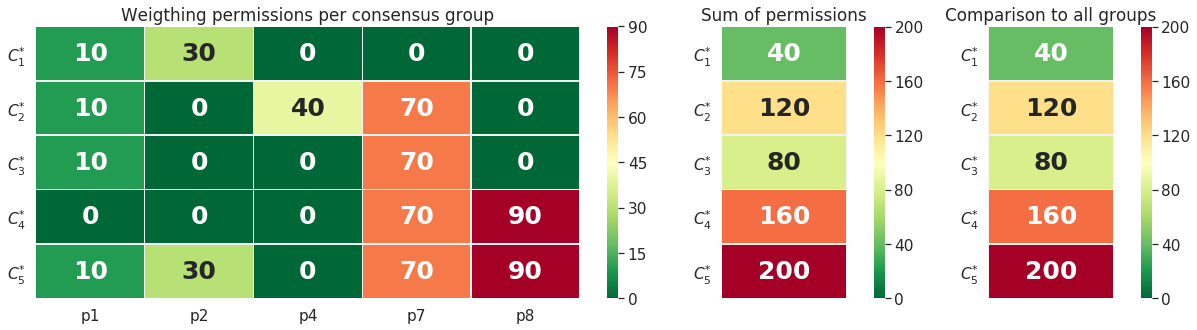

In [121]:
fig = plt.figure(figsize=(20,5))
sns.set(font_scale=1.4)
#grid size
gs = gridspec.GridSpec(1, 30, wspace=2.5, hspace=.8)
#define axis
ax1 = plt.subplot(gs[0, :-15])
ax_bar1 = plt.subplot(gs[0, -15:-14])
ax2 = plt.subplot(gs[0,-12:-8])
ax_bar2 = plt.subplot(gs[0, -8:-7])
ax3 = plt.subplot(gs[0,-5:-1])
ax_bar3 = plt.subplot(gs[0, -1])
#set axis' title
ax1.set_title("Weigthing permissions per consensus group")
ax2.set_title("Sum of permissions")
ax3.set_title("Comparison to all groups")
#drawing graphs
im1 = sns.heatmap(group_array, xticklabels = x_axis, yticklabels = y_axis, annot=True, annot_kws={"weight": 'bold', "size":25}, fmt="d", cmap="RdYlGn_r", linewidths=.5, linecolor="#F2F2F2", ax=ax1, cbar_ax=ax_bar1)
im2 = sns.heatmap(weighting_sum, annot=True, annot_kws={"weight": 'bold', "size":25}, xticklabels=False, yticklabels = y_axis, fmt="d", cmap="RdYlGn_r", linewidths=.5, linecolor="#F2F2F2", ax=ax2, vmin=0, cbar_ax=ax_bar2)
im3 = sns.heatmap(weighting_sum, annot=True, annot_kws={"weight": 'bold', "size":25}, xticklabels=False, yticklabels = y_axis, fmt="d", cmap="RdYlGn_r", linewidths=.5, linecolor="#F2F2F2", ax=ax3, vmin=0, vmax=max(weighting_sum), cbar_ax=ax_bar3)
ax1.set_yticklabels(ax1.get_yticklabels(),rotation=0)
ax2.set_yticklabels(ax1.get_yticklabels(),rotation=0)
ax3.set_yticklabels(ax1.get_yticklabels(),rotation=0)
#Save figure on jupyter-notebook
# fig_name_png = "pictures/" + notebookName + "_energy_analysis.png"
# plt.savefig(fig_name_png, transparent=False)
# filename = "none"
# fig_name_pdf = "../files_to_analyse/graphs/" + filename + ".pdf"
# plt.savefig(fig_name_pdf)
plt.show()

### Permission Analysis Graph

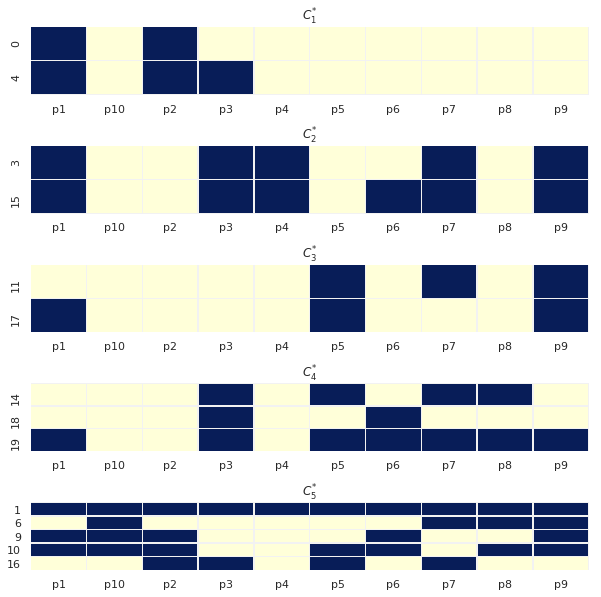

In [122]:
#fig, axs = plt.subplots(nrows=10, ncols=4)
sns.set(font_scale=1.0)
fig, axs = plt.subplots(graph_qty, 1, figsize=(MAX_GRAPH_WIDTH, MAX_GRAPH_HEIGHT))
plt.subplots_adjust(hspace=.75)
for i in range(graph_qty):
        axs[i].set_title(GROUP_NAME_BEFORE + str(i+1) + GROUP_NAME_AFTER)
        sns.heatmap(sliced_matrix[i], xticklabels = xticks, cbar = False, square=False, yticklabels = list_of_all_worthy_identical_objects_sorted[i],
                    cmap="YlGnBu", linewidths=.5, linecolor="#F2F2F2", ax=axs[i])
#Save figure on jupyter-notebook
# fig_name_png = "pictures/" + notebookName + "_background.png"
# plt.savefig(fig_name_png, transparent=False)
# fig_name_pdf = "pictures/" + notebookName + "_background.pdf"
# plt.savefig(fig_name_pdf)